考虑在实际样本分布中，数据使用线性模型可能效果不好，常常采用非线性模型，下面示例简单的多项式回归

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures  #生成多项式的包
from sklearn.linear_model import LinearRegression

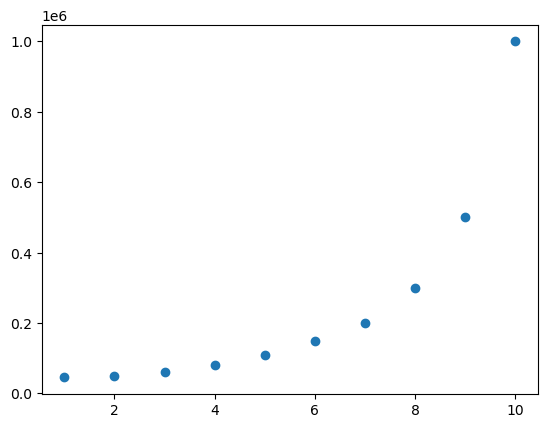

In [46]:
#导入数据（职位等级与薪酬的数据）
data = np.genfromtxt("job.csv",delimiter=',')
x_data = data[1:,1]  #第0行是说明，不导入
y_data = data[1:,2]
plt.scatter(x_data,y_data)
plt.show()

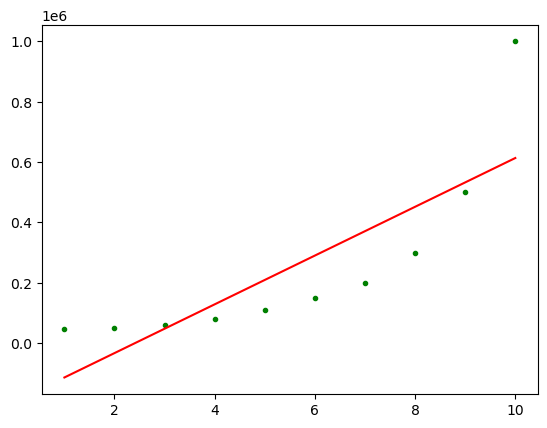

In [47]:
x_data = x_data[:,np.newaxis]
y_data = y_data[:,np.newaxis]
model = LinearRegression()
model.fit(x_data,y_data)

plt.plot(x_data,y_data,'g.')
plt.plot(x_data,model.predict(x_data),'r')  #模型拟合结果
plt.show()

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]


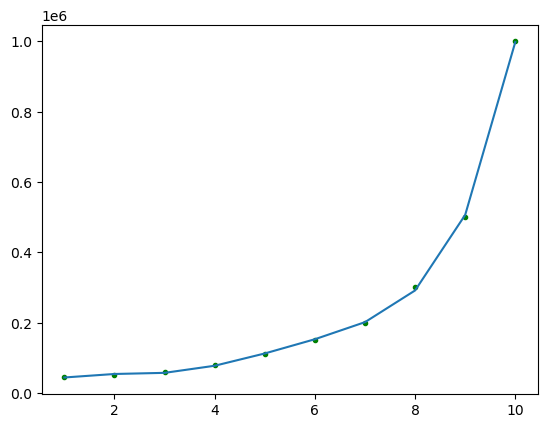

In [53]:
# 根据结果，我们显然需要使用一个多项式进行拟合，使用sklearn库里提供的PolynomialFeatures生成多项式
'''
PolynomialFeatures主要有以下几个参数：
degree：度数，决定多项式的次数
interaction_only： 默认为False，字面意思就是只能交叉相乘，不能有a^2这种.
include_bias: 默认为True, 这个bias指的是多项式会自动包含1，设为False就没这个1了.
order：有"C" 和"F" 两个选项。官方写的是在密集情况（dense case）下的输出array的顺序，F可以加快操作但可能使得subsequent estimators变慢。
'''
polyRegression = PolynomialFeatures(degree=5)
#特征处理
x_poly = polyRegression.fit_transform(x_data)  #根据degree的次数，列依次为 偏置常数、一次、二次······
print(x_poly)
#定义回归模型
linMod = LinearRegression()
#训练模型
linMod.fit(x_poly,y_data)

plt.plot(x_data,y_data,'g.')
plt.plot(x_data,linMod.predict(x_poly))
plt.show()

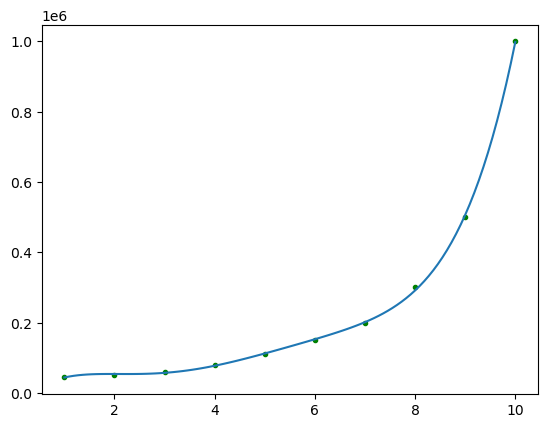

In [57]:
#考虑平滑画线
plt.plot(x_data,y_data,'g.')
x_test = np.linspace(1,10,100)
x_test = x_test[:,np.newaxis]
plt.plot(x_test,linMod.predict(polyRegression.fit_transform(x_test)))
plt.show()